<h2>Homework 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [11]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression 
from scipy import linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [12]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept:  [22.79653465]
-------------------------------------------
Coefficients:  [[-0.996232    0.69558769  0.28047684  0.71933958 -2.02678678  3.14074199
  -0.17447147 -3.08322662  2.24869616 -1.76573775 -2.03984933  1.13874218
  -3.61718128]]
-------------------------------------------
Training dataset error = 10.8208
Testing dataset error = 12.1557


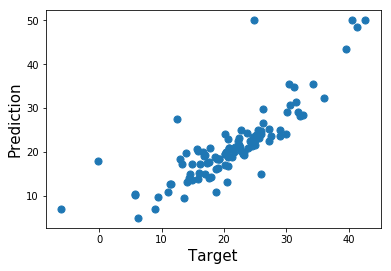

In [17]:
# Task 1-1: use linear regression in sklearn
#creating linear regression instance
regression = LinearRegression()
#fitting linear model
regression.fit(train_data, train_target)


# Task 1-2: show intercept and coefficents using built-in function intercept_ and coef_
print ('Intercept: ', regression.intercept_)
print('-------------------------------------------')
print ('Coefficients: ', regression.coef_)
print('-------------------------------------------')

# Task 1-3: show errors on training dataset and testing dataset

#getting prediction for training dataset for calculating error.
predictTrain = regression.predict(train_data)
#getting prediction for testing dataset for calculating error.
predictTest = regression.predict(test_data)

#getting prediction for training dataset for caluculating error.
trainingdataseterror = np.mean((train_target - predictTrain) ** 2)/2
testingdataseterror = np.mean((test_target - predictTest) ** 2)/2

#Printing the training and testing dataset errors upto 4 decimal places
print('Training dataset error ='+' '+"%.4f" %trainingdataseterror)
print('Testing dataset error ='+' '+"%.4f" %testingdataseterror)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, predictTest, s=50) # plot graph with target as X-axis and predict value as Y-axis.
plt.xlabel("Target", size='15') # x-axis title
plt.ylabel("Prediction", size='15') # y-axis title
plt.show() #displaying the graph



<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept:  [22.79653465]
-------------------------------------------
Coefficients:  [[-0.996232  ]
 [ 0.69558769]
 [ 0.28047684]
 [ 0.71933958]
 [-2.02678678]
 [ 3.14074199]
 [-0.17447147]
 [-3.08322662]
 [ 2.24869616]
 [-1.76573775]
 [-2.03984933]
 [ 1.13874218]
 [-3.61718128]]
-------------------------------------------
Training dataset error = 10.8208
Testing dataset error = 12.1557


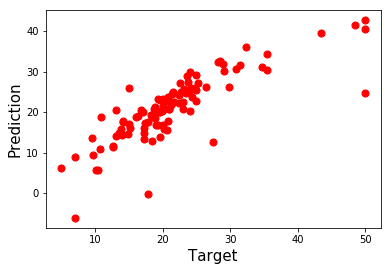

In [18]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    Z = X.transpose().dot(X) #getting the value of transposed X multiplied by X
    Y = np.linalg.inv(Z) #getting the inversed version value of earlier step
    Q = Y.dot(X.transpose()) #multiplying the result of previous step by transposed X
    normalEq = Q.dot(y) #getting the final value by multiplying with y
    return normalEq
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):#Function defined for predicting given training or testdata and weights generated by normal equation
    return X.dot(w) #dot product of X by a vector of weights

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)


# Here we call myNormalEqual to train the model and get weights
# Weight values returned by normal equation function saved in w
w = myNormalEqualFun(train_data_intercept,train_target) 


#getting predictions for test dataset and train dataset
predTest = myPredictFun(test_data_intercept, w) 
predTrain = myPredictFun(train_data_intercept, w) 

# Task 2-3: generating intercept and coefficents
print ('Intercept: ', w[0]) #Print the generated intercept value
print('-------------------------------------------')
print ('Coefficients: ', w[1:14]) #Print the generated coefficient values
print('-------------------------------------------')

# Task 2-4: show errors on training dataset and testing dataset
trainingDatasetError = np.mean((train_target - predTrain) ** 2)/2
testingDatasetError = np.mean((test_target - predTest) ** 2)/2

#Printing the training and testing dataset errors upto 4 decimal places
print('Training dataset error ='+' '+"%.4f" %trainingDatasetError)
print('Testing dataset error ='+' '+"%.4f" %testingDatasetError)

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, predTest,  s=50, color = 'red')
plt.xlabel("Target", size='15')
plt.ylabel("Prediction", size='15')
plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept:  [22.7955505]
-------------------------------------------
Coefficients:  [[-0.86381796]
 [ 0.41720781]
 [-0.0676055 ]
 [ 0.76296887]
 [-1.59163816]
 [ 3.31151516]
 [-0.20578004]
 [-2.65884215]
 [ 1.18064817]
 [-0.7170903 ]
 [-1.93745362]
 [ 1.14767234]
 [-3.56316846]]
-------------------------------------------
Training dataset error = 10.9303
Testing dataset error = 12.6838


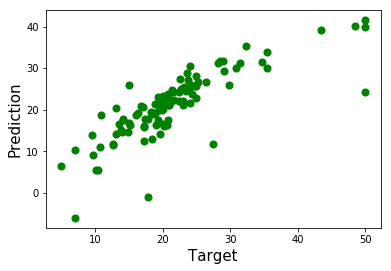

In [22]:
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    w = np.zeros((X.shape[1], 1)) #Intialize an array with coloumns as 1 and X.shape[1] as row.
    for i in range(numItrs): #For loop for with the range 0 to numItrs and calculating cost function and store it in W.
        costFunction = np.divide(X.transpose().dot(np.subtract(y, np.dot(X, w))), X.shape[0])
        w = w + (learning_rate * costFunction)
    return w

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) # Dot product of X by its vector of weights.

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)  #(arr,obj,values,axis)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: Learning rate = 0.01 and iteration = 1000

w = myGradientDescentFun(train_data_intercept,train_target,0.01,1000)

#getting predictions for test dataset and train dataset
prediction_test = myPredictFun(test_data_intercept, w) 
prediction_train = myPredictFun(train_data_intercept, w) 

# Task 3-3: generating intercept and coefficents
print ('Intercept: ', w[0])
print('-------------------------------------------')
print ('Coefficients: ',w[1:14])
print('-------------------------------------------')

# Task 3-4: show errors on training dataset and testing dataset
Training_dataset_error = np.mean((train_target - prediction_train) ** 2)/2
Testing_dataset_error = np.mean((test_target - prediction_test) ** 2)/2

#Printing the training and testing dataset errors upto 4 decimal places
print('Training dataset error ='+' '+"%.4f" %Training_dataset_error)
print('Testing dataset error ='+' '+"%.4f" %Testing_dataset_error)

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, prediction_test, s=50, color='green')
plt.xlabel("Target", size='15')
plt.ylabel("Prediction", size='15')
plt.show()